<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MATLAB-like-convolution-function-for-DSP-application-in-Python" data-toc-modified-id="MATLAB-like-convolution-function-for-DSP-application-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MATLAB like convolution function for DSP application in Python</a></span></li></ul></div>

### MATLAB like convolution function for DSP application in Python
* Gary Decosmo
* October 27,2021

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Convolution function and nsize function for MATLAB like results
* Makes use of numpy.convolve() function

In [2]:
# modified convolution function
def convolve(x,xn,h,hn):
    '''Convolution of two discrete sequences by extending the numpy library conv function
       returns a dictionary containing two sequences: y[n] and n
       Example: y = convolve(x,xn,h,hn)
                yn = y['y[n]']
                n = y['n']
       Then you can graph with pyplot.stem(n,yn)
       Or enter directly as pyplot.stem(y['n'],y['y[n]'])
    '''
    minN = min(xn) + min(hn)
    maxN = max(xn) + max(hn)
    n = np.array((range(minN, maxN + 1)))
    yn = np.convolve(x,h)
    return {'n':n,'y[n]':yn}

def nsize(xn, zero_index):
    '''Generate an array sized from the input array [xn] and shifted according to zero index\n
       zero index is the nth integer from the left ie... [1,0,8,2], 8 is 3rd integer so zero_index is 3
    '''
    stop = (len(xn) - zero_index) + 1 #defines end point of array
    start = -(abs((len(xn))) - stop)
    return list(range(start,stop))

**Step 1:** Define `x` and `h` sequences

In [3]:
x = np.array([3,11,7,0,-1,4,2])
h = np.array([2,3,0,-5,2,1])

**Step 2:** Define `xn` and `hn` sequences specifying zero locations

In [4]:
xn = nsize(x,4) # saying that zero is at x[3] or the 4th integer from the left
hn = nsize(h,2) # saying that zero is at x[1] or the 2nd integer from the left

**Step 3:** Pass in parameters
* Note you could just enter s

In [5]:
y = convolve(x,xn,h,hn)
y

{'n': array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 'y[n]': array([  6,  31,  47,   6, -51,  -5,  41,  18, -22,  -3,   8,   2])}

Indexing `n` sequence

In [6]:
n = y['n']
n

array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

Indexing `y[n]`

In [7]:
yn = y['y[n]']
yn

array([  6,  31,  47,   6, -51,  -5,  41,  18, -22,  -3,   8,   2])

Plotting with `matplotlib.pyplot`

<StemContainer object of 3 artists>

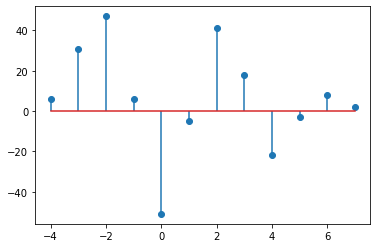

In [8]:
plt.stem(n,yn)

A prettier plot

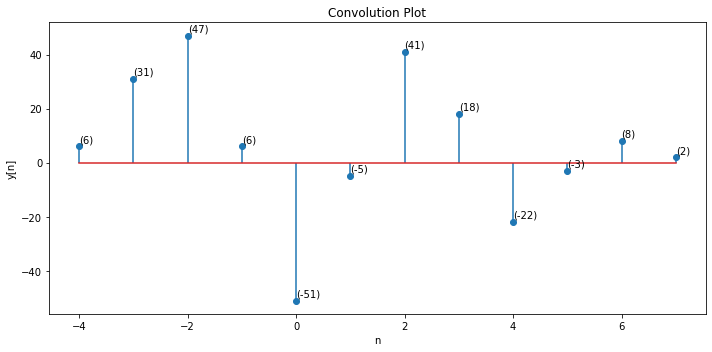

In [9]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.stem(n,yn)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolution Plot')
for i, j in zip(n, yn):
    plt.text(i, j+1.5, '({})'.format(j))

Adding plot option to function

In [10]:
def conv_m(x,xn,h,hn,plot=None):
    '''Convolution of two discrete sequences by extending the numpy library conv function
       returns a dictionary containing the sequence y[n]
       Example: y = convolve(x,xn,h,hn)
                yn = y['y[n]']
                n = y['n']
       Then you can graph with pyplot.stem(n,yn)
       Or enter directly as pyplot.stem(y['n'],y['y[n]'])
       Optional parameter plot = True returns plot, no plot parameter or plot=False returns no plot
       and only solution
    '''
    minN = min(xn) + min(hn)
    maxN = max(xn) + max(hn)
    n = np.array((range(minN, maxN + 1)))
    yn = np.convolve(x,h)
    sol =  {'n':n,'y':yn}
    if plot == True:
        plt.rcParams["figure.figsize"] = [10, 5]
        plt.rcParams["figure.autolayout"] = True
        plt.stem(n,yn)
        plt.xlabel('n')
        plt.ylabel('y[n]')
        plt.title('Convolution Plot')
        for i, j in zip(n, yn):
            plt.text(i, j+1.5, '({})'.format(j))
    return sol

Output of function with plot parameter option
* If no parameter is entered for plot, it returns dictionary with n and yn sequences
* Can specify `plot = False` if desired but not necessary if no plot is desired
* `plot = True` returns plot **AND** dictionary containing yn and n sequences

{'n': array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 'y': array([  6,  31,  47,   6, -51,  -5,  41,  18, -22,  -3,   8,   2])}

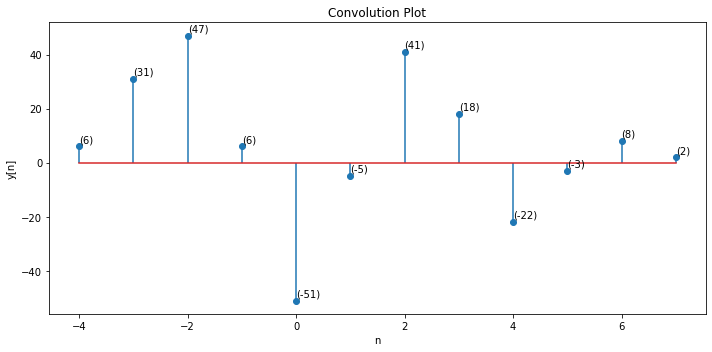

In [11]:
yn_plot = conv_m(x,xn,h,hn,plot=True)
yn_plot

With no plot parameter `plot = None` is default

In [12]:
conv_m(x,xn,h,hn)

{'n': array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 'y': array([  6,  31,  47,   6, -51,  -5,  41,  18, -22,  -3,   8,   2])}